<a href="https://colab.research.google.com/github/DivyaDeswal/Projects/blob/main/Simple_Image_Classifier_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import numpy as np
import cv2  # OpenCV to load images easily
import os

# **Data Loading**

In [ ]:
cat_images = [
    r'/cat1.jpg',
    r'/cat2.jpg',
    r'\cat3.jpg',
    r'\cat4.jpg',
    r'\cat5.jpg',
    r'\cat6.jpg',
]

dog_images = [
    r'/dog1.jpg',
    r'\dog2.jpg',
    r'\dog3.jpg',
    r'\dog4.jpg',
    r'\dog5.jpg',
    r'\dog6.jpg',
    r'\dog7.jpg',
]

In [ ]:
# Prepare dataset
X = []
y = []

In [ ]:
# Function to display images
def display_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

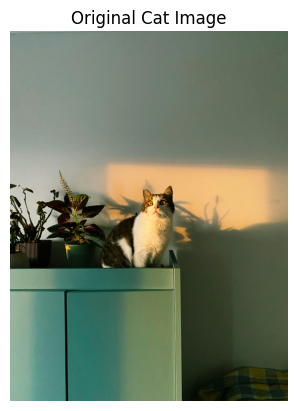

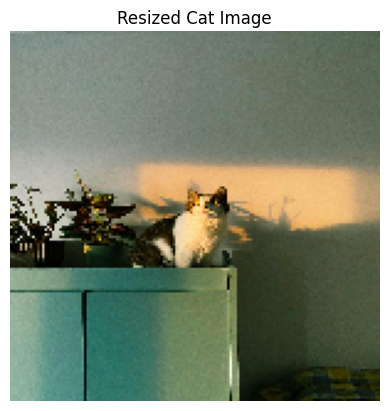

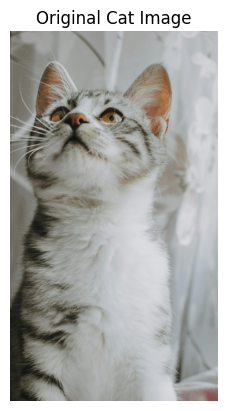

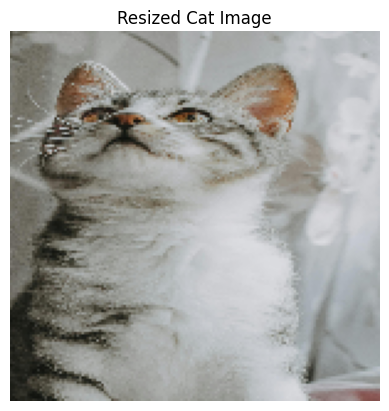

In [ ]:
# Load cat images and display
for img_path in cat_images:
    img = cv2.imread(img_path)
    if img is not None:
        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Show original image
        display_image("Original Cat Image", original_img)

        # Resize the image
        resized_img = cv2.resize(original_img, (150, 150))

        # Show resized image
        display_image("Resized Cat Image", resized_img)

        X.append(resized_img)
        y.append(0)  # 0 for cat

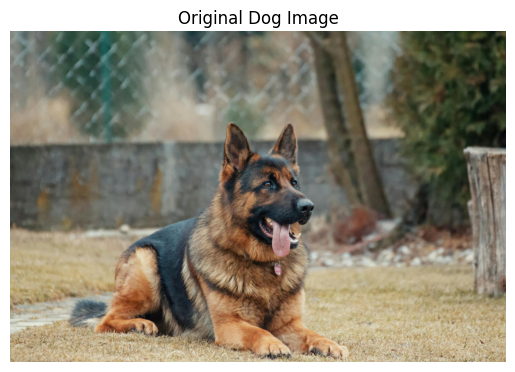

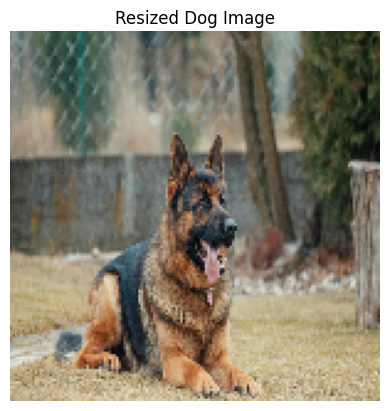

In [ ]:
# Load dog images and display
for img_path in dog_images:
    img = cv2.imread(img_path)
    if img is not None:
        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Show original image
        display_image("Original Dog Image", original_img)

        # Resize the image
        resized_img = cv2.resize(original_img, (150, 150))

        # Show resized image
        display_image("Resized Dog Image", resized_img)

        X.append(resized_img)
        y.append(1)  # 1 for dog

In [ ]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# Normalize the images (scale pixel values 0-255 → 0-1)
X = X / 255.0

# **Build Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Train the model**

In [ ]:
model.fit(X, y, epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step - accuracy: 0.6667 - loss: 0.7742
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.6667 - loss: 0.6931
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.6667 - loss: 0.6452
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.6667 - loss: 0.4712
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 1.0000 - loss: 0.3774
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 1.0000 - loss: 0.3050
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 1.0000 - loss: 0.2502
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 1.0000 - loss: 0.2121
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 1.0000 - loss: 0.1605
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 0.1059
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.0586
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 1.0000 - lo

# **Save the model**

In [ ]:
model.save('cat_dog_model.h5')